<a href="https://colab.research.google.com/github/hodades/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection: A Machine Learning Approach to Anomaly Detection and Class Imbalance Handling**

---

## **Table of Contents**

1. [Introduction](#1-introduction)
2. [Libraries and Dependencies](#2-libraries-and-dependencies)
3. [Data Overview & Preprocessing](#3-data-overview--preprocessing)
4. [Exploratory Data Analysis](#4-exploratory-data-analysis)
5. [Feature Scaling and Train-Test Split](#5-model-scaling-and-training-test-split)
6. [Model Building](#6-model-building)
7. [Model Evaluation](#7-model-evaluation)
   - [7.1 Isolation Forest](#71-isolation-forest)
   - [7.2 Local Outlier Factor (LOF)](#72-local-outlier-factor-lof)
   - [7.3 Support Vector Machine (SVM)](#73-support-vector-machine-svm)
8. [Conclusion and Recommendations](#8-conclusion-and-recommendations)
   - [8.1 Conclusions](#81-conclusions)
   - [8.2 Recommendations](#82-recommendations)

---

## **1. Introduction**

In this project, we aim to detect fraudulent credit card transactions using machine learning anomaly detection models. The main challenge lies in the highly imbalanced nature of the data, where fraudulent transactions make up only a small portion of the dataset. We'll address this by using various techniques to handle the class imbalance and compare the performance of several models.

---

## **2. Libraries and Dependencies**

To run this project, you need to install and import the following libraries:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


---

## **3. Data Overview and Preprocessing**
We first load the dataset and inspect its structure to understand its features and check for any missing values.
Link to the dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [ ]:
# Load dataset
Card = pd.read_csv('creditcard.csv')

In [ ]:
# Basic dataset information
Card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

these v1 v2.........v12 stands for : the features recorded during a transaction but due to privacy, the names of columns are anonymous.

In [ ]:
# Statistical overview
Card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking for duplicate rows
print(f"Duplicate rows: {Card.duplicated().sum()}")

Duplicate rows: 1081


In [ ]:
# Check first few entries
Card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Handling Duplicates

In [ ]:
# Remove duplicate rows
Card.drop_duplicates(keep='first', inplace=True)
print(f"Shape after removing duplicates: {Card.shape}")


Shape after removing duplicates: (283726, 31)


###Handling missing data

In [ ]:
# Check for missing values
Card.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


###Preprocessing Steps:
Feature and target separation: we're going to split the dataset into features and the target variable.
Feature scaling: Standardize the features for better model performance.

In [ ]:
# Determine number of fraud cases in Cardset
Fraud = Card[Card['Class'] == 1]
Valid = Card[Card['Class'] == 0]
Outlier = len(Fraud)/float(len(Valid))
print(Outlier)
print('Fraud Cases: {}'.format(len(Card[Card['Class'] == 1])))
print('Valid Transactions: {}'.format(len(Card[Card['Class'] == 0])))

0.0032200018941187613
Fraud Cases: 102
Valid Transactions: 31677


---

## **4. Exploratory Data Analysis**

EDA helps us understand the distribution of the data and explore the relationships between features.

Distribution of Fraudulent vs Valid Transactions

In [ ]:
# Split data into fraud and valid transactions
Fraud = Card[Card['Class'] == 1]
Valid = Card[Card['Class'] == 0]

# Proportion of fraud cases
print(f"Fraud cases: {len(Fraud)}")
print(f"Valid cases: {len(Valid)}")
print(f"Fraud proportion: {len(Fraud)/float(len(Valid)):.4f}")


Fraud cases: 473
Valid cases: 283253
Fraud proportion: 0.0017


Transaction Amounts by Class

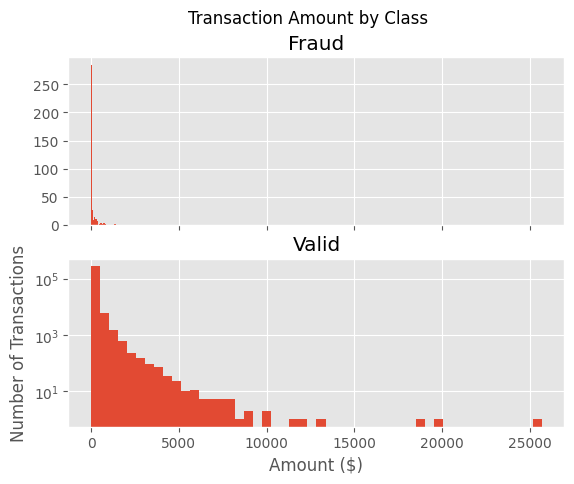

In [ ]:
# Plot the distribution of transaction amounts by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Transaction Amount by Class')

ax1.hist(Fraud['Amount'], bins=50)
ax1.set_title('Fraud')

ax2.hist(Valid['Amount'], bins=50)
ax2.set_title('Valid')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


Time vs Amount Analysis

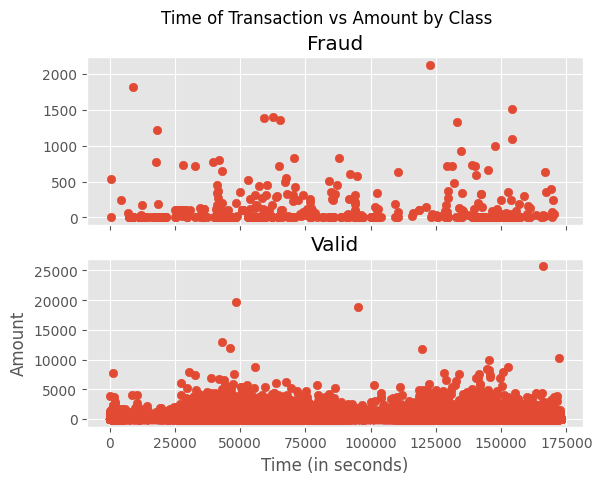

In [ ]:
 # We Will check Do fraudulent transactions occur more often during certain time frame ?
#Let us find out with a visual representation.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(Fraud['Time'], Fraud['Amount'])
ax1.set_title('Fraud')

ax2.scatter(Valid['Time'], Valid['Amount'])
ax2.set_title('Valid')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()


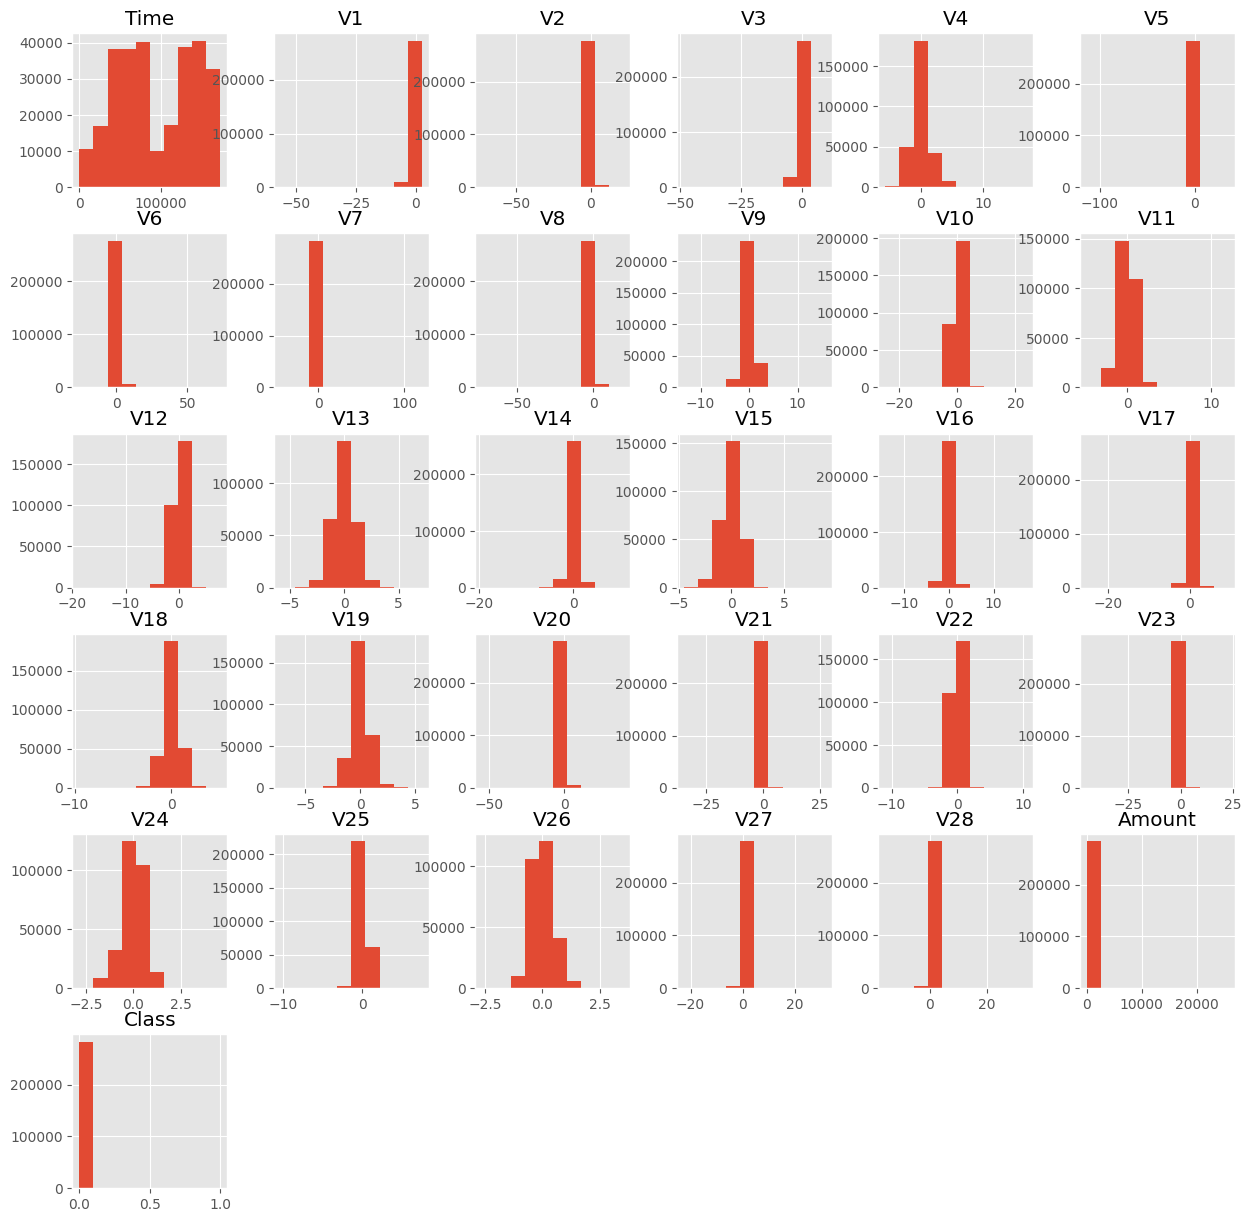

In [ ]:
# plot the histogram of each parameter
from matplotlib import pyplot
Card.hist(figsize = (15, 15))
pyplot.show()

---

## **5. Feature Scaling and Train-Test Split**



In [ ]:
# Separate features and target
X = Card.drop(columns=['Class'])
y = Card['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


---

## **6. Model Building**
We will build three anomaly detection models:

* Isolation Forest
* Local Outlier Factor (LOF)
* Support Vector Machine (SVM)

###6.1 Isolation Forest

In [ ]:
# Build Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.00167, random_state=42)
isolation_forest.fit(X_train)
# Predict on test set
y_pred_if = isolation_forest.predict(X_test)
y_pred_if = np.where(y_pred_if == -1, 1, 0)  # Convert to 1 for fraud, 0 for valid

###6.2 Local Outlier Factor (LOF)
Since LOF is a sensitive algorithm, we will use the original data and a smaller subset to avoid high computational cost.

In [ ]:
# Build Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.00167)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)  # Convert to 1 for fraud, 0 for valid


###6.3 Support Vector Machine (SVM)

In [ ]:
# Build One-Class SVM model
svm_model = OneClassSVM(nu=0.00167, kernel='rbf', gamma='auto')
svm_model.fit(X_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)  # Convert to 1 for fraud, 0 for valid


---

## **7. Model Evaluation**
Evaluate the performance of each model using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

In [ ]:
# Evaluate Isolation Forest
evaluate_model(y_test, y_pred_if, "Isolation Forest")

--- Isolation Forest ---
Accuracy: 0.9972
Precision: 0.1837
Recall: 0.1895
F1 Score: 0.1865
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.18      0.19      0.19        95

    accuracy                           1.00     56746
   macro avg       0.59      0.59      0.59     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Evaluate LOF
evaluate_model(y_test, y_pred_lof, "Local Outlier Factor")

--- Local Outlier Factor ---
Accuracy: 0.9967
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

--- Support Vector Machine ---
Accuracy: 0.9884
Precision: 0.0700
Recall: 0.4842
F1 Score: 0.1223
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.07      0.48      0.12        95

    accuracy                           0.99     56746
   macro avg       0.53      0.74      0.56     56746
weighted avg       1.00      0.99      0.99     56746



#### **7.1 Isolation Forest**

The results from the **Isolation Forest** model show:

- **Accuracy**: 99.72%
- **Precision**: 18.37%
- **Recall**: 18.95%
- **F1 Score**: 18.65%

While the model demonstrates high accuracy, its recall and precision values are low. The recall of 18.95% indicates that the model correctly identifies only a small portion of the actual fraudulent cases. The precision of 18.37% suggests that many of the flagged fraudulent transactions are actually valid, which leads to a considerable number of false positives. This model is heavily biased towards predicting non-fraudulent transactions, likely due to the class imbalance.

#### **7.2 Local Outlier Factor (LOF)**

The **Local Outlier Factor (LOF)** model performed poorly:

- **Accuracy**: 99.67%
- **Precision**: 0.00%
- **Recall**: 0.00%
- **F1 Score**: 0.00%

The LOF model failed to identify any fraudulent transactions, as indicated by the zero values in precision, recall, and F1 score. Despite having a high accuracy, this is entirely driven by the correct classification of non-fraudulent transactions. This makes LOF highly ineffective for this specific fraud detection task.

#### **7.3 Support Vector Machine (SVM)**

The results from the **SVM** model are as follows:

- **Accuracy**: 98.84%
- **Precision**: 7.00%
- **Recall**: 48.42%
- **F1 Score**: 12.23%

The **SVM model** demonstrates a significant improvement in recall (48.42%), meaning that it captures nearly half of the fraudulent cases. However, its precision of 7.00% shows that many of the flagged fraud cases are false positives. While the recall is better than Isolation Forest, the precision is much lower, which negatively impacts the model’s overall effectiveness.

---

### **8. Conclusion and Recommendations**

#### **8.1 Conclusions**

Based on the model results:

1. **Isolation Forest**:
   - High accuracy, but low precision and recall make this model insufficient for effective fraud detection. The model fails to adequately identify fraudulent cases, likely due to the imbalance in the dataset.

2. **Local Outlier Factor (LOF)**:
   - The LOF model is not suitable for this task, as it fails to detect any fraudulent transactions. Its high accuracy is deceptive, driven entirely by the correct identification of non-fraudulent transactions, and offers no value for fraud detection.

3. **Support Vector Machine (SVM)**:
   - The SVM model demonstrates a reasonable balance, achieving a **recall of 48.42%**. However, the **precision of 7.00%** indicates that a majority of flagged fraud cases are actually valid. This high rate of false positives limits the practicality of using this model in isolation for real-world applications.

#### **8.2 Recommendations**

1. **Hyperparameter Tuning**:
   - **Isolation Forest**: Adjusting the contamination parameter and experimenting with the number of estimators may improve recall.
   - **SVM**: Fine-tuning the `nu` and `gamma` parameters might help balance precision and recall for better fraud detection.

2. **Class Imbalance Handling**:
   - The dataset's extreme imbalance likely contributes to the poor performance of the models, particularly LOF and Isolation Forest. Applying **SMOTE** or other resampling techniques could improve the models' ability to detect fraudulent cases.

3. **Ensemble Learning**:
   - An ensemble approach that combines the strengths of Isolation Forest (higher precision) and SVM (higher recall) may improve overall performance, providing a more reliable method for fraud detection.

4. **Cost-Sensitive Learning**:
   - Using cost-sensitive algorithms that place a higher penalty on missed fraud cases (false negatives) could help improve recall without sacrificing too much precision. This is especially important when the cost of a missed fraud is higher than the cost of a false positive.

5. **Threshold Adjustment**:
   - The decision threshold for classification can be adjusted, particularly for the **SVM model**, to improve precision. A lower threshold might increase recall, while a higher threshold could improve precision.

6. **Feature Engineering**:
   - Additional features such as transaction frequency, location data, and merchant information could provide more context, helping the models better differentiate between legitimate and fraudulent transactions.

7. **Deep Learning Models**:
   - Investigating deep learning models like **autoencoders** or **LSTM networks** could offer better performance in complex datasets like credit card fraud detection, especially when class imbalance is a challenge.


---

This concludes the evaluation and recommendations for the fraud detection models. Further improvements, including hyperparameter tuning, class imbalance handling, and ensemble approaches, can significantly improve the models' effectiveness in real-world fraud detection scenarios.
